# 4章 ニューラルネットワークの学習

# 4.1. データから学習する

## 4.1.1. データ駆動

> コンピュータビジョンの分野で有名な特徴量としては、SIFT や SURF、HOG などが挙げられます。そのような特徴量を使って画像データをベクトルに変換し、その変換されたベクトルに対して、機械学習で使われる識別器―― SVM や KNN など――で学習させることができます。

SIFT や SURF については山﨑先生の講義の第 7,8 回や [qiita](https://qiita.com/icoxfog417/items/adbbf445d357c924b8fc) を参照．回転やスケールにロバストな特徴量(検出器)の代表格．  
つまり例えば，猫の耳が上下左右どっちから写ってても拡大縮小されててもどのくらい拡大縮小されて写ってても，同じような値になってくれる特徴量．

> ただし、画像をベクトルに変換する際に使用した特徴量は、「人」が設計したものであることに注意が必要です。というのは、問題に応じて適した特徴量を使わなければ(もしくは特徴量 を設計しなければ)、なかなか良い結果が得られないのです。たとえば、犬の顔を見 分けるためには、「5」を認識する特徴量とは別の特徴量を人が考える必要があるかも しれません。つまり、特徴量と機械学習によるアプローチでも、問題に応じて、「人」 の手によって適した特徴量を考える必要があるかもしれないのです。

ビジネス課題 PBL では「体感気温」とか「晴れてる時の気温」とかいう特徴量(交互作用的な)を自分で工夫して作って，それを使って回帰モデル組んで，精度向上(知見発掘)を目指した．まあ確かに，画像とかみたいに生の説明変数の意味が薄いようなデータでこれやるのは，大変．

> ニューラルネットワークやディープラーニングは、従来の機械学習で使われた手法以上に、人の介入を遠ざけることができるという重要な性質を持ちます。

> 図4-2 に示すとおり、ニューラルネットワークは、画像を“そのまま”学習します。 2 つ目のアプローチ――特徴量と機械学習によるアプローチ――の例では人が特徴量 を設計しましたが、ニューラルネットワークは，画像に含まれる重要な特徴量までも「機械」が学習するのです

これ，よく言われる表現だが，まあどういう意味での主張か理解できた．  

1. 例えば回帰のニューラルネットワークモデルを考える．  
2. 一般的には，出力層での活性化関数は恒等関数．  すなわち，出力層のノード(アウトカムの値そのもの)は，最後の隠れ層ノードの線形結合になってる．  
3. ここで，一番最後の隠れ層ノードっていうのは，マクロな視点で見ると，説明変数を線形変換・活性化で何度も何度も変換して得られた特徴量である．  データから交互作用をめっちゃ考慮した特徴量を作った感じ．  
4. こう考えると，DNNは「重要な特徴量＝最終隠れ層ノード」を学習で獲得して，それで線形回帰している，とも捉えられる．

このことから

> ディープラーニングは、「end-to-end machine learning」と呼ばれること があります。ここで言う end-to-end とは、「端から端まで」という意味であ り、これは生データ(入力)から目的の結果(出力)を得ることを意味します。

と言われてるそうだが，前処理(正規化とか白色化)が重要だっていう記述は前にあったし，ハイパラ調整の問題も残ってるし，まだまだ自動化しきれていないと思う．

## 4.2. 損失関数

> ニューラル ネットワークの学習で用いられる指標は、**損失関数** (loss function)と呼ばれます。この損失関数は、任意の関数を用いることができますが、一般には、2乗和誤差や交差エントロピー誤差などが用いられます。

モデルのパラメータ推定のための最適化問題の目的関数のことを，一般に「損失関数(ロス関数，コスト関数)」って言うんだろうな．  
交差エントロピーは使ったことないから理解しよう．

出力(アウトカム)は多次元なので， (4.1) の２乗誤差は

$$
E_i = \frac{1}{2} \sum_{k=1}^K (y_{ik} - t_{ik})^2
$$

という感じで表すのが厳密かな．  
ここで，$K$ は出力の次元 (ノード数) で，$y_{ik}$は $i$ 番目のケースに対する $k$ 番目の出力ノードの値 (確率の予測値)で，$t$ は同様に真のクラスをone-hot-encoding したもので $i$ 番目のケースがクラス $k$ に該当する時は $t_{ik} = 1$ でそれ以外では $0$．こう表した $E_i$ が，$i$ 番目のデータ(観測値,ケース)に対する二乗誤差．  
$\frac{1}{2}$ はなんか計算上の都合だと思う，後でわかりそう．
てか，

> $y_k$ はニューラルネットワークの出力、$t_k$ は教師データを表し、

っていうノーテーションは PRML と同じだな．俺いつも $\widehat{y}, y$ を使ってたが，まあハットめんどいしこっちのが楽だな． True の T だし．

In [3]:
import numpy as np

In [5]:
def squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

squared_error(np.array(y), np.array(t))

0.09750000000000003

## 4.2.2. 交差エントロピー誤差

２乗誤差の時と同様，出力ノードが多次元なので，

$$
E_i = - \sum_{k=1}^K t_{ik} \log y_{ik}
$$

が $i$ 番目のデータ (ケース) に対する予測の交差エントロピー．  
PRML の p208,209 の (4.108) では「多クラス分類に対する交差エントロピー誤差」という名で同じ定義がある．

「交差エントロピー」という名の意味について考えていく．

まず $y_k$ がここではソフトマックス関数が返した値であることを思い出すと，交差エントロピーの定義に含まれる $-\log y_k$ は「確率 $y_k$ の値(事象)が観測された際に得られる情報量」である (PRLM の 1.92 式)．本来なら「得られる情報量 $-\log y_k$ の期待値」がエントロピーだが (PRML の 1.93 式)，まあその辺の区別せず交差"エントロピー"という名前になってるのだと思う．

PRML の (4.90) にはロジスティックにおける交差エントロピー誤差関数の定義があって，多クラス分類での交差エントロピー(PRML の 4.108)　と見た目違うがやってることは全く同じ．なぜなら，ロジスティックでは $t=0,1$ で2つのクラスを表しているので，(4.90)は「真のクラスが$t=1$のときは $y$ の情報量を足し込んで，真のクラスが $t=0$ のときは $1-y$ の情報量を足しこむ」という操作をやってて，これを多クラスにそのまま拡張したのが (4.108) だから．  
そんで2クラスverの交差エントロピー (4.90) を見ると， クラスベクトル $t$ と出力ベクトル $y$ が交差(クロス)している感じがして， "交差"エントロピーという名も納得．

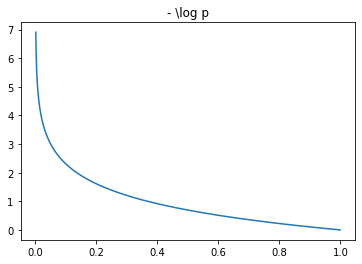

In [26]:
# エントロピー(情報量) log(p) のグラフ
# 珍しい値(事象)ほど観測された時に得られる情報が多い，という思想．PRML参照．

import matplotlib.pyplot as plt

x = np.arange(0.001, 1, 0.001)
y = - np.log(x)

plt.plot(x, y)
plt.title("- \log p")
plt.show()

> そのため、式 (4.2) つまり交差エントロピー誤差は実質的に正解ラベルが 1 に対応する出力の自然対数 (情報量) を計算するだけになります。

ていう事実と↑のグラフから考えると，交差エントロピーは損失関数としてはまあ使えそうだな．  
学習の時に微分が使いやすいとか，そういうメリットも後で紹介されるんだと思う．  

まあ強引にクロスエントロピー誤差(の全ケース分の和)の意味を解釈するとしたら「予測(分類)を行った全ケースの真のクラスを観測した時の意外性(驚き度合い, え予測外れてんじゃん度合い)の合計」という感じか．

あと気になる点としては，出力ノードの値が $y < 0$ となった場合はどうしてんだろう．あ，最後の活性化関数にソフトマックスを使えば心配無用か．  
けど，↓の実装では 0 が渡される可能性を考慮して対策してるぽい．

In [43]:
# np.log(0)   # -inf が返される．これだと，定義式中で 0 * -inf の不定形が生じて死ぬかも．
np.log(1e-7)  # 超微小の値を足す．

-16.11809565095832

In [44]:
# def cross_entropy_error(y, t):
#     return - np.sum(t * np.log(y))

def cross_entropy_error(y, t):  
    delta = 1e-7
    return - np.sum(t * np.log(y + 1e-7))
# t=0,y=0 で 0*-inf の不定形が生じるのを防ぐため．
# ソフトマックスを噛ませばこういう心配無いと思うが...

In [48]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

## 4.2.3. ミニバッチ学習

> 先ほど説明した損失関数の例は、ひとつのデータの損失関数を考えてい ました。そこで、訓練データすべての損失関数の和を求めたいとすると、たとえば、 交差エントロピー誤差の場合、次の式 (4.3) のように書くことができます。
$$
E = - \frac{1}{N} \sum_n \sum_k t_{nk} \log y_{nk}
$$

あ，なんだ，この話ここで出てくるのか．  
PRML の p48 を参照．エントロピー(てか情報量)をそのまま足し合わせると言うことは，情報理論的には各観測値の $y_i$ を独立と思っている感じになる．

> 最後に N で割って正規化しています。こ の N で割ることによって、1 個あたりの「平均の損失関数」を求めることになりま す。そのように平均化すれば、訓練データの数に関係なく、いつでも統一した指標が 得られます。たとえば、訓練データが 1,000 個や 10,000 個の場合であっても、1 個 あたりの平均の損失関数を求められます。

これやっても最適化問題としては変わらない気がするので，まあ，どういうモチベかわからん．ミニバッチ学習の時に必要？

> すべてのデータを対象とした損失関数を計算 するのは、現実的ではありません。そこで、データの中から一部を選び出し、その一 部のデータを全体の「近似」として利用します。ニューラルネットワークの学習にお いても、訓練データからある枚数だけを選び出し――これをミニバッチ(小さな塊) と言う――、そのミニバッチごとに学習を行います。たとえば、60,000 枚の訓練デー タの中から 100 枚を無作為に選び出して、その 100 枚を使って学習を行うのです。 このような学習手法をミニバッチ学習と言います。

こういう問題意識は NN 特有な感じがして，これまで触れてこなかった．  

線形回帰のパラメータ推定で強引に例えてみる．  
目的関数は $(y - X \beta)^T (y - X \beta)$ で，これは $ \beta = (\beta_1, \beta_2, \ldots, \beta_p)^T$ 関数．巨大な $X, y$ から一部の行(観測値)を抜き出して $X_s, y_s$ を作り(これがミニバッチ)，本来最適化したい $(y - X \beta)^T (y - X \beta)$ を計算が軽く済む $(y_s - X_s \beta)^T (y_s - X_s \beta)$　で近似して，こっちについて最適化を行う．そうすると，ちゃんとランダムサンプリングできていれば，低い計算コストで (平均的には) 同じ値の $\widehat{\beta}$ をゲットできる．  
イメージ的には例えば，よく見る 2変数ロジスティックの対数尤度関数の山を，一部のサンプルだけを見て作った山で近似する感じ．

In [1]:
import sys
import os
sys.path.append(os.pardir)

from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)
# one_hot_label=True　で，数字ラベルを one hot encoding で取得

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [10]:
%load_ext rpy2.ipython

In [39]:
print(np.random.choice(10, 3))
%R print( sample(0:9, 3, replace=F))

[4 3 2]


[1] 6 9 8


In [29]:
batch_size = 10
idx = np.random.choice(x_train.shape[0], batch_size)
x_batch = x_train[idx, :]
t_batch = t_train[idx, :]
print(x_batch.shape, t_batch.shape)

(10, 784) (10, 10)


In [79]:
 # 入力として，
# - ndim=1 の array (単一の観測値)
# - ndim=2 の array (ミニバッチ)
# の両方を処理できるようにしたいので，どうするかというと...

y = np.array([0, 1, 0, 0])
print(y)
print(y.ndim)
print(y.shape)

y_2d = y.reshape(1, y.shape[0])
print(y_2d)
print(y_2d.ndim)
print(y_2d.shape)

y = np.array([[0.1, 0.3, 0.6], [0.5, 0.4, 0.1]])
t = np.array([[0, 0, 1], [1, 0, 0]])
t*y
t*np.log(y + 1e-7)                                    # 0が入力された時用
- np.sum(t*np.log(y + 1e-7), axis=1)                 # 丁寧に観測値ごとにクロスエントロピーロスを算出して，
np.sum(- np.sum(t*np.log(y + 1e-7), axis=1)) # それを足し合わせる．
- np.sum(t*np.log(y + 1e-7))                              # けどまあ，面倒だから一気に全部足してOK 

[0 1 0 0]
1
(4,)
[[0 1 0 0]]
2
(1, 4)


1.2039724376593033

In [86]:
def cross_entropy_error(y, t):
    if y.ndim == 1:  # ndim=1(ベクトル) つまり単一観測値が入力されたら ndim=2(行列) に整形
        y = y.reshape(1, y.shape[0])
        t = t.reshape(1, t.shape[0])
    return - (1/y.shape[0]) * np.sum(t * np.log(y + 1e-7))

In [97]:
y = np.array([[0.1, 0.3, 0.6], [0.5, 0.4, 0.1]])
t = np.array([[0, 0, 1], [1, 0, 0]])
# y = np.array([0.1, 0.3, 0.6])
# t = np.array([0, 0, 1])

cross_entropy_error(y=y, t=t)

0.6019862188296516

In [94]:
# クラスが one-hot じゃなくてラベルで与えられた時の実装方法を考えるため...

mat = np.array([["00", "01", "02"], ["10", "11", "12"], ["20", "21", "22"]])
mat[[0, 1], [1, 2]]

# おお，こんな感じで「 i 行 j　列と k　行　ｌ 列と... を持ってきてね」という抽出ができるのか．

array(['01', '12'], dtype='<U2')

In [104]:
def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        y = y.reshape(1, y.shape[0])
    return - (1/y.shape[0]) * np.sum(np.log(y[np.arange(y.shape[0]), t] + 1e-7))

In [105]:
y = np.array([[0.1, 0.3, 0.6], [0.5, 0.4, 0.1]])
t = np.array([2, 0])
# y = np.array([0.1, 0.3, 0.6])
# t = 2
# t = np.array([2])

cross_entropy_error_label(y=y, t=t)

0.6019862188296516

## 4.2.5. なぜ損失関数を設定するのか？

> 私たちが目標とすることは、できるだけ認識精度が高くなるニューラルネッ トワークを獲得することなので、「認識精度」を指標にすべきではないか、という疑 問です。

たしかに，言われてみればこの疑問は自然．実際，決定木だと (推奨はジニ係数とかエントロピーだけど) 誤判別率を不純度として使うことあるよね．

この 4.2.5. の話，全体的に面白い．まとめると...

1. 明らかに，認識精度(誤分類率) は，ある重みパラメータをちょっと動かしただけだと，全く変化しない．
2. つまりパラメータでの微分 (誤分類率の勾配) が，大半の場所で 0 となる．となると，勾配降下(学習, パラメータ探索)できない．
3. 活性化関数が滑らかでないときも，損失関数が滑らかでなくなってしまうので，1.2.と全く同じく学習ができなくなってしまう．

この説明だと，ステップじゃなくてシグモイド(非線型関数)を使うことの理由も人に説明しやすそう．ニューラルネットワーク内の関数のどこか１つでも滑らかじゃない関数があると，そのせいで損失関数も滑らかじゃなくなって，勾配降下できなくなる．

まあもっと砕いた説明をすると，損失関数を容器みたいな感じで見て，そこにボールを入れて底まで届かせることをイメージすれば良い．傾きが０のところがあったら，底までいけない．

# 4.3. 数値微分

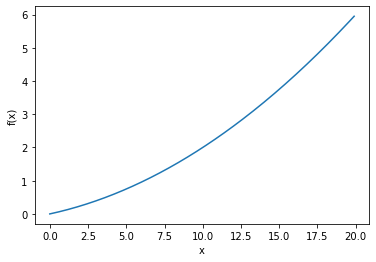

In [152]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

# 解析的に微分すると 0.02*x + 0.1

import matplotlib.pyplot as plt
x = np.arange(0, 20, 0.1)
y = function_1(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [141]:
# 数値微分のダメな実装例

def numerical_diff_not(f, x):
    h = 1e-50                              # h を 0 に近づけすぎていて丸め誤差の問題発生
    return (f(x+h) - f(x)) / h

In [145]:
print( numerical_diff_not(function_1, 5) )
print( numerical_diff_not(function_1, 10) )
print( numerical_diff_not(function_1, 100) )
print( numerical_diff_not(function_1, 1000) )

print(function_1(10+1e-50), function_1(10))
print(function_1(10+1e-50) - function_1(10))

# 解析的に求められた勾配と全然一致しない．
# 丸め誤差(ビット数不足でどこかでほんのわずかにある差が丸められて0になってしまった)が原因で微分0．

0.0
0.0
0.0
0.0
2.0 2.0
0.0


In [146]:
# 数値微分の良い例

def numerical_diff(f, x):
    h = 1e-4                                               # 丸め誤差対策で h は大きめ
    return (f(x+h) - f(x-h)) / (2*h)         # 近似精度上げるため前方差分でなく中心差分を使用

In [148]:
print( numerical_diff(function_1, 5) )
print( numerical_diff(function_1, 10) )
print( numerical_diff(function_1, 100) )
print( numerical_diff(function_1, 1000) )

print(function_1(10 + 1e-4), function_1(10 - 1e-4))
print(function_1(10 + 1e-4) - function_1(10 - 1e-4))

0.1999999999990898
0.2999999999986347
2.1000000001691888
20.099999992453377
2.0000300000999998 1.9999700001
5.999999999972694e-05


## 4.3.3. 偏微分

In [176]:
def function_2(x):
    return x[0]**2 + x[1]**2
#     return np.sum(x**2)


# f(x) = x0^2 + x1^2
# グラフの形は式から明らか．x0,x1いずれかを固定(定数化)すれば 2次関数x^2

In [177]:
# x0=3, x1=4 における勾配を1変数微分 function だけ使って求める． 

def tmp0(x0):  # x1=4 で固定してバサッと切った断面
    return function_2(np.array([x0, 4]))

def tmp1(x1):  # x0=3 で固定してバサッと切った断面
    return function_2(np.array([3, x1]))


print( numerical_diff(tmp0, 3), numerical_diff(tmp1, 4))

6.00000000000378 7.999999999999119


# 4.4. 勾配

In [178]:
print( np.zeros(3) )

tmpvec = np.array([1,2,3])
tmpmat = np.array([[1,2,3], [4,5,6]])

print( np.zeros_like(tmpvec)  )
print( np.zeros_like(tmpmat) )

# np.zeros_like() ってめっちゃ便利だな．こういう操作すること多い．

[0. 0. 0.]
[0 0 0]
[[0 0 0]
 [0 0 0]]


In [179]:
print(  np.array([1,2,3]).size                   )
print(  np.array([[1,2,3],[4,5,6]]).size  )
# ndim 問わず全要素数が返されるのか．

3
6


In [180]:
def numerical_gradient(f, x):
    
    h = 1e-4                                  # 丸め誤差対策で小さくしすぎない
    grad = np.zeros_like(x)         # x(変数ベクトル)と同じ形の array を生成．これを勾配に仕上げる
    
    for idx in range(x.size):         # 変数ベクトルを1次元ずつループ
        
        tmp = x[idx]                 # x[idx] を逃しておく
        
        x[idx] = tmp + h
        fxh1 = f(x)
        
        x[idx] = tmp - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)   # 中心差分で偏微分係数を近似算出して記録
        
        x[idx] = tmp                # x[idx] を元に戻す
        
    return grad

In [197]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

# numerical_gradient(function_2, np.array([3, 4]))
# え，こっちだと全然ダメな結果になった．ちゃんと .0 を打って float として扱わせないとやばいのか．

array([6., 8.])

In [205]:
# 各地点の勾配を見ながらセルフ勾配降下
# 最小化(降下)したいので，勾配がプラスなら負の方向に動いて，マイナスなら正の方向に動くべき

print( numerical_gradient(function_2, np.array([3.0, 4.0])) )
print( numerical_gradient(function_2, np.array([2.0, 3.0])) )
print( numerical_gradient(function_2, np.array([0.0, 1.0])) )
print( numerical_gradient(function_2, np.array([0.0, 0.0])) )

[6. 8.]
[4. 6.]
[0. 2.]
[0. 0.]


In [207]:
# from ch04/gradient_2d.py

# 勾配を矢印で表した図 4-9 を生成するための関数を，今後も自分で使いやすいようにカスタマイズしたい．
# 例えばロジスティックの勾配降下を説明する時とかに便利そう．